In [34]:
from PIL import Image
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations as A 
import albumentations.pytorch 
from albumentations.pytorch  import ToTensorV2
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os 

In [76]:
class ImageFolder(Dataset):
    def __init__(self, root_dir, transform=None):
        super(ImageFolder,self).__init__() 
        self.data = []
        self.root_dir = root_dir
        self.transform = transform
        self.class_names= os.listdir(root_dir)

        for index, name in enumerate(self.class_names):
            files = os.listdir(os.path.join(root_dir,name))
            self.data += list(zip(files, [index]*len(files)))
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        img_file , label = self.data[index]
        root_and_dir = os.path.join(self.root_dir,self.class_names[label])
        image = np.array(Image.open(os.path.join(root_and_dir,img_file)))

        if self.transform is not None:
            augmentations= self.transform(image=image)
            image = augmentations['image']

        return image, label

transform = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.6),
        A.Rotate(limit=40,p=0.9),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25,b_shift_limit=25,p=0.8),
        A.Normalize(
            mean=[0,0,0],
            std =[1,1,1],
            max_pixel_value=225,
        ),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5)
        ],p=1.0),
        
        ToTensorV2(),
    ]
)


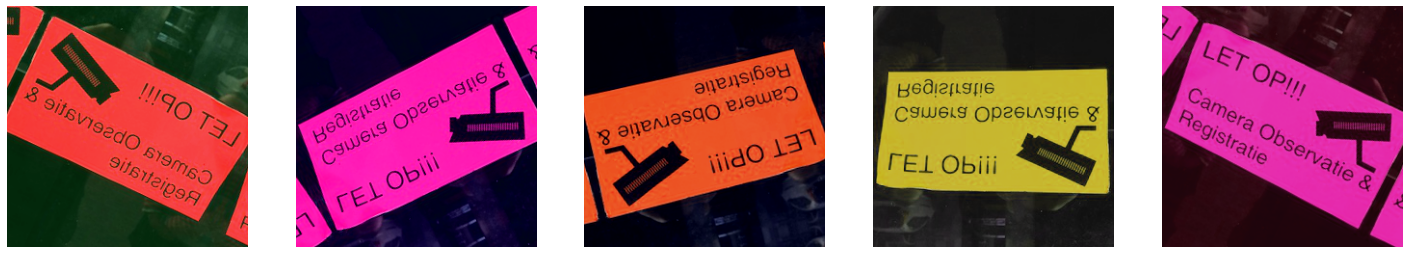

In [78]:
dataset = ImageFolder(root_dir='practice',transform=transform)

num_samples = 5
fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))
for i in range(num_samples):
  
  ax[i].imshow(transforms.ToPILImage()(dataset[5][0]))
  ax[i].axis('off')

In [ ]:
#https://www.youtube.com/watch?v=rAdLwKJBvPM
#https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8
